In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# 1. Create a dummy dataset
data = pd.DataFrame({
    'age': [25, 32, 40, 28, 50, 22, 36, 29, 48, 31],
    'income': [40000, 55000, 65000, 35000, 70000, 30000, 60000, 32000, 80000, 50000],
    'buys_house': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
})

In [3]:
X = data[['age', 'income']]
y = data['buys_house']

In [4]:
# 2. Train a Decis
ion Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

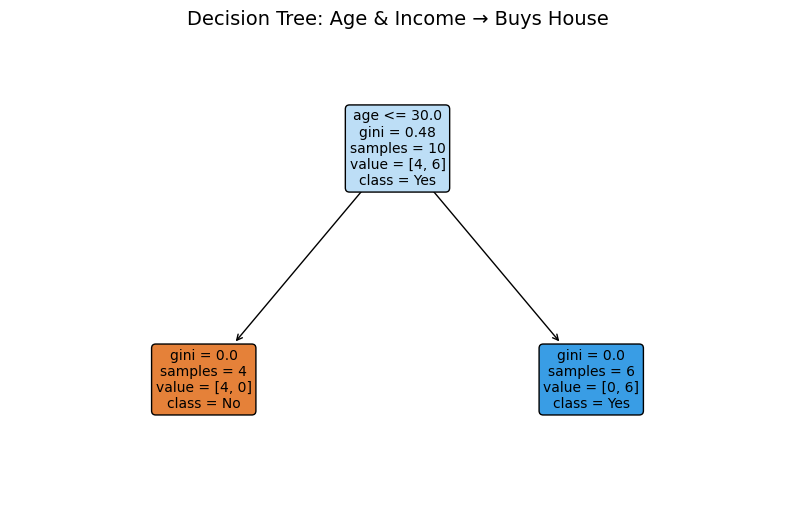

In [5]:
# 3. Visualize the Tree
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=['age', 'income'], class_names=['No', 'Yes'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree: Age & Income → Buys House", fontsize=14)
plt.show()

In [6]:
# 4. Predictions & Results
data['predicted'] = clf.predict(X)
data['predicted_prob'] = clf.predict_proba(X)[:,1]  # probability of buying house
print("\n--- Actual vs Predicted ---")
print(data)


--- Actual vs Predicted ---
   age  income  buys_house  predicted  predicted_prob
0   25   40000           0          0             0.0
1   32   55000           1          1             1.0
2   40   65000           1          1             1.0
3   28   35000           0          0             0.0
4   50   70000           1          1             1.0
5   22   30000           0          0             0.0
6   36   60000           1          1             1.0
7   29   32000           0          0             0.0
8   48   80000           1          1             1.0
9   31   50000           1          1             1.0


In [7]:
# 5. Feature Importance
importances = pd.Series(clf.feature_importances_, index=['age','income'])
print("\n--- Feature Importances ---")
print(importances.sort_values(ascending=False))



--- Feature Importances ---
age       1.0
income    0.0
dtype: float64


In [8]:
# 6. Explanation
print("\nExplanation:")
print("1. The first split occurs on 'age' because it best separates buyers from non-buyers.")
print("2. If age > 30, probability of buying a house is higher, so tree checks income next.")
print("3. 'Age' has the highest importance score, meaning it is the strongest predictor.")
print("4. 'Income' refines the prediction but contributes less than 'age'.")


Explanation:
1. The first split occurs on 'age' because it best separates buyers from non-buyers.
2. If age > 30, probability of buying a house is higher, so tree checks income next.
3. 'Age' has the highest importance score, meaning it is the strongest predictor.
4. 'Income' refines the prediction but contributes less than 'age'.
